In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor      
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor  
from xgboost import XGBRegressor
import warnings



## Import the csv file

In [ ]:
df=pd.read_csv('stud.csv')

In [18]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### prepare X and Y variables

In [19]:
X=df.drop(columns=['math_score'],axis=1)

In [20]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [21]:
y=df['math_score']

In [22]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [23]:
## create column transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numerical_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [

        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numerical_transformer, num_features)     
    ]
)

In [24]:
X=preprocessor.fit_transform(X) 

In [25]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 19))

In [26]:
X.shape

(1000, 19)

In [27]:
##seperate the data into train and test sets
from sklearn.model_selection import train_test_split    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

#### create a function to evaluate the model

In [28]:
def evaluate_model(true,predicted):
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2 = r2_score(true, predicted)
    mae = mean_absolute_error(true, predicted)
    return rmse, r2, mae    

In [29]:
##model list

models= {
    "KNeighborsRegressor": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "SVR": SVR(),
    "CatBoostRegressor": CatBoostRegressor(verbose=0),
    "XGBRegressor": XGBRegressor(eval_metric='rmse')
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    ##evaluation

    model_train_rmse, model_train_r2, model_train_mae = evaluate_model(y_train, y_train_pred)
    model_test_rmse, model_test_r2, model_test_mae = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance on train set:")
    print(f"RMSE: {model_train_rmse}, R2: {model_train_r2}, MAE: {model_train_mae}")
    print("Model performance on test set:")     
    print(f"RMSE: {model_test_rmse}, R2: {model_test_r2}, MAE: {model_test_mae}")
    print("\n")
    print("--------------------------------------------------")
    print("\n")
    r2_list.append(model_test_r2)

    



KNeighborsRegressor
Model performance on train set:
RMSE: 5.707683417990174, R2: 0.8554978341651085, MAE: 4.516749999999999
Model performance on test set:
RMSE: 7.253040741647602, R2: 0.7838129945787431, MAE: 5.621


--------------------------------------------------


DecisionTreeRegressor
Model performance on train set:
RMSE: 0.2795084971874737, R2: 0.9996534669718089, MAE: 0.01875
Model performance on test set:
RMSE: 8.31534725672957, R2: 0.7158483823350528, MAE: 6.595


--------------------------------------------------


RandomForestRegressor
Model performance on train set:
RMSE: 2.2714925637854875, R2: 0.9771136127516491, MAE: 1.8221770833333335
Model performance on test set:
RMSE: 6.061894013458142, R2: 0.848989888030826, MAE: 4.757956547619048


--------------------------------------------------


AdaBoostRegressor
Model performance on train set:
RMSE: 5.774804549348105, R2: 0.852079221711008, MAE: 4.728155881404614
Model performance on test set:
RMSE: 5.976275271625322, R2: 0.

In [30]:
## Resultant r2_score list according to type of model
result_df = pd.DataFrame({'Model': model_list, 'R2_Score': r2_list})
result_df = result_df.sort_values(by='R2_Score', ascending=False).reset_index(drop=True)

result_df

,Model,R2_Score
0,Ridge,0.880593
1,LinearRegression,0.880433
2,AdaBoostRegressor,0.853226
3,CatBoostRegressor,0.851632
4,RandomForestRegressor,0.848990
5,XGBRegressor,0.827797
6,Lasso,0.825320
7,KNeighborsRegressor,0.783813
8,SVR,0.728600
9,DecisionTreeRegressor,0.715848


#### Hence it is better to go with the Linear regressor model as it has the highest R2 score of 88%.

## Linear Regression

In [31]:
lin_model = LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train, y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test, y_pred)
print(f"R2 score(Accuracy) of Linear Regression model: {score}")

R2 score(Accuracy) of Linear Regression model: 0.8804332983749565


#### Plot y_test vs y_pred

Text(0.5, 1.0, 'Actual vs Predicted Values')

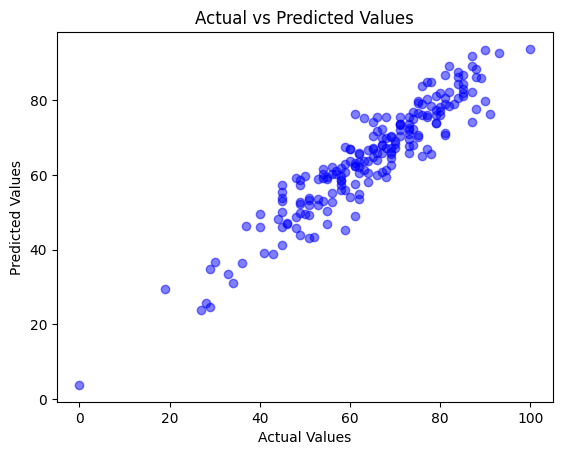

In [32]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')  
plt.title('Actual vs Predicted Values')

Text(0.5, 1.0, 'Actual vs Predicted Values with Regression Line')

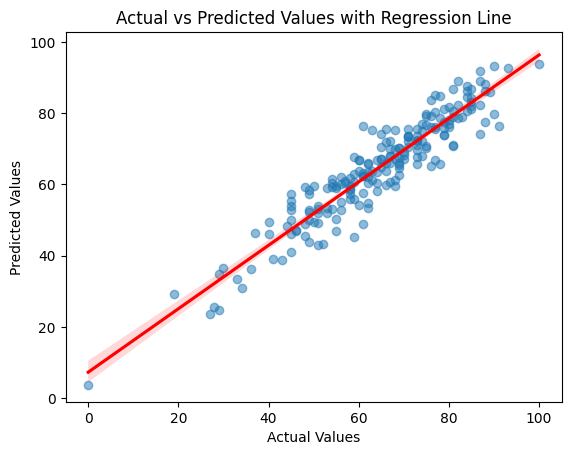

In [33]:
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Actual Values') 
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values with Regression Line')

#### Difference between actual and predicted values

In [34]:
pred_df= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': y_test - y_pred})
pred_df.head()

,Actual,Predicted,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
